# Autoregressive processes
* Theory
* Practical
    * Prepare your data for Autoregression - trend, variance, seasonality
    * Build a lag / series of lags
    * Make a prediction based on this lag/lags
    * Reconstruct - Undo stationarity on the prediction
    * Check autocorrelation

## Theory behind AR(p)

An autoregressive process is a stochastic process of the form:

$$
y_t = b + \sum_{j=1}^{P}w_{j}Y_{t-j} + \epsilon_t
$$

where $b$ is the bias, $w_j$ are the weights of the model and $\epsilon$ is some iid (e.g. Gaussian) noise. For the noise it holds that $E(\epsilon_t) = E(\epsilon) = 0$ and $V(\epsilon_t) = V(\epsilon) = \sigma^2$. E.g. expectation and variance are constant and time invariant.


For the case of $P=1$ we can write the process as:

$$
y_t = b + w_1Y_{t-1} + \epsilon_t
$$

This can then be used to make predictions n-steps in the future, by using the prediction at time step t+1 as input to predicting time t+2 etc. [Find out more here](https://en.wikipedia.org/wiki/Autoregressive_model#n-step-ahead_forecasting)

*- trend, seasonality, and variance in temperature data we can correct for*

*- noise (error term) we cannnot correct for (there is no pattern in the noise)*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('data/temp_data_decomposed_stationarized.csv', index_col=0)
df.head(8)

,TG,diff,pct,month,monthly_mean,stationary_temp,detrend_div,detrend_sub
DATE,,,,,,,,
1876-01-01,275.35,NaN,NaN,1,-0.005496,NaN,NaN,NaN
1876-01-02,275.65,0.3,0.001090,1,-0.005496,0.305496,-54.582996,0.305496
1876-01-03,273.45,-2.2,-0.007981,1,-0.005496,-2.194504,400.275304,-2.194504
1876-01-04,267.35,-6.1,-0.022308,1,-0.005496,-6.094504,1109.854251,-6.094504
1876-01-05,263.35,-4.0,-0.014962,1,-0.005496,-3.994504,727.773279,-3.994504
1876-01-06,265.45,2.1,0.007974,1,-0.005496,2.105496,-382.080972,2.105496
1876-01-07,266.55,1.1,0.004144,1,-0.005496,1.105496,-200.137652,1.105496
1876-01-08,264.25,-2.3,-0.008629,1,-0.005496,-2.294504,418.469636,-2.294504


### 5. 1 Stationarise the data: Build a lag/ series of lag
* An autoregression model is a linear regression model that uses lagged variables as input variables, so we need to identify and define p
* The lag of p will be how far into the future we are predicting!
* We should check out the correlation of each lag to help us decide

*in timeseries: X data has to be historical data of itself that s why we have to create more data (by shifting the data through time)*

*the most useful lag for weather data is the day before*

In [4]:
YEAR = list(range(1,13))
YEAR

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [5]:
for month in YEAR:
    df[f'{month}_shifted_stationary_temp'] = df.stationary_temp.shift(month)

In [6]:
df.head()

,TG,diff,pct,month,monthly_mean,stationary_temp,detrend_div,detrend_sub,1_shifted_stationary_temp,2_shifted_stationary_temp,3_shifted_stationary_temp,4_shifted_stationary_temp,5_shifted_stationary_temp,6_shifted_stationary_temp,7_shifted_stationary_temp,8_shifted_stationary_temp,9_shifted_stationary_temp,10_shifted_stationary_temp,11_shifted_stationary_temp,12_shifted_stationary_temp
DATE,,,,,,,,,,,,,,,,,,,,
1876-01-01,275.35,NaN,NaN,1,-0.005496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1876-01-02,275.65,0.3,0.001090,1,-0.005496,0.305496,-54.582996,0.305496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1876-01-03,273.45,-2.2,-0.007981,1,-0.005496,-2.194504,400.275304,-2.194504,0.305496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1876-01-04,267.35,-6.1,-0.022308,1,-0.005496,-6.094504,1109.854251,-6.094504,-2.194504,0.305496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1876-01-05,263.35,-4.0,-0.014962,1,-0.005496,-3.994504,727.773279,-3.994504,-6.094504,-2.194504,0.305496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# fill NAs 
#df.isna().sum()
df.fillna(method='bfill', inplace=True) # fill missing values
#df.isna().sum()

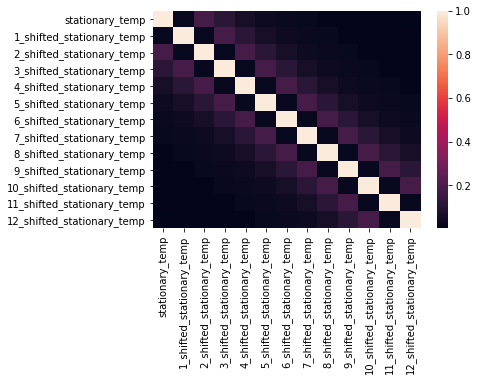

In [8]:
sns.heatmap(df[[x for x in df.columns if ('stationary') in x]].corr().abs()) # absolute values, we do not care about negative corr relationships

### 5.2 Train-Test Split

In [9]:
df.columns

Index(['TG', 'diff', 'pct', 'month', 'monthly_mean', 'stationary_temp',
       'detrend_div', 'detrend_sub', '1_shifted_stationary_temp',
       '2_shifted_stationary_temp', '3_shifted_stationary_temp',
       '4_shifted_stationary_temp', '5_shifted_stationary_temp',
       '6_shifted_stationary_temp', '7_shifted_stationary_temp',
       '8_shifted_stationary_temp', '9_shifted_stationary_temp',
       '10_shifted_stationary_temp', '11_shifted_stationary_temp',
       '12_shifted_stationary_temp'],
      dtype='object')

In [10]:
features = df.columns[8:]
features

Index(['1_shifted_stationary_temp', '2_shifted_stationary_temp',
       '3_shifted_stationary_temp', '4_shifted_stationary_temp',
       '5_shifted_stationary_temp', '6_shifted_stationary_temp',
       '7_shifted_stationary_temp', '8_shifted_stationary_temp',
       '9_shifted_stationary_temp', '10_shifted_stationary_temp',
       '11_shifted_stationary_temp', '12_shifted_stationary_temp'],
      dtype='object')

In [11]:
# no train_test_split(X, y) because it is random
# and in time series data the sequence is very important!
X_train = df.loc[:'2017-12-31'][features]
y_train = df.loc[:'2017-12-31']['stationary_temp']


# test data from 2017-2019
X_test = df.loc['2017-01-01':'2019-12-31'][features]
y_test = df.loc['2017-01-01':'2019-12-31']['stationary_temp']

In [12]:
m = LinearRegression()
m.fit(X_train, y_train)
m.score(X_train, y_train)

0.0835183879515421

### 5.3 Make a prediction based on this lag/lags

In [13]:
y_pred_stat_temp = m.predict(X_test)

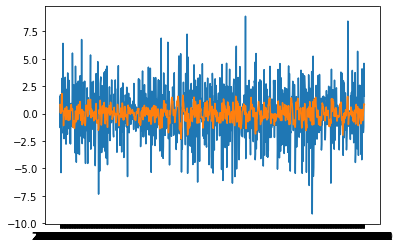

In [17]:
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, (m.predict(X_test)))

### 5. Decomposition
  1. Decompose the time series (done in the script before)
  2. Train a model on the decomposed data (done)
  3. Create a prediction from the model (done)
  4. Recompose the predictions

In [ ]:
# write decompose (in the other scrpt) and reconstruct functions!!!
# then
# then predictions on original scale

# put everything into a pipleline
# Pipeline (decompose - predict - recompose prediction)
# crossvalidation 

### 6. Recomposition/ Reconstruction - undo stationarity on the prediction
* We aren't predicting stationary data, but actual data, so we have to undo what we just did


## Checklist!! Apply this to your climate data:
* Stationarise the data
* Build a lag / series of lags
* Make a prediction based on this lag/lags
* Reconstruct - Undo stationarity on the prediction
* Check autocorrelation


you need to unstationarize ypred!
take ypred and pass it to the inverse transform for all of the steps

1 ....
2. take a baseline .... instead of diff
3. exponent function instead of log 